## MACS 30100 Project 2
### Music Genre Classification with Random Forest, KNN, and Gaussian Naive Bayes Models
Yingzi Jin

### Task
- **Goal**:
    
    In this project, I will practice supervised learning by training multiclass classification models to identify music genres and compare their performance.


- **Chapters**:
    1. Data <br>
        1.1 Data Description <br>
        1.2 Data Preprocessing <br>
        1.3 Data Exploration
    
    2. Models <br>
        2.1 Random Forest Classifier <br>
        2.2 K-Nearest Neighbors Classifier <br>
        2.3 Gaussian Naive Bayes Classifier
    
    3. Model Comparison <br> 

### Import Libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

### DATA

#### 1.1 Data Description

Data Source: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv

Altough I downlowded the dataset from the Kaggle page, it was originally acquired from one of the MachineHack Hackathon. 

Content: acoustic features of songs and the music genres they belong to

In [68]:
df = pd.read_csv('train.csv')
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [69]:
df.shape

(17996, 17)

Features:
- Size: 17996
- 17 in total
- 2 text, 11 continuous, 4 discrete 
- Class:
    - 0: Acoustic
    - 1: Alternative
    - 2: Blues
    - 3: Bollywood
    - 4: Country
    - 5: HipHop
    - 6: Indie
    - 7: Instrumental
    - 8: Metal
    - 9: Pop
    - 10: Rock


#### 1.2 Data Preprocessing

1.2.1 Data Cleaning

In [70]:
# drop duplicates and rows with null
df = df.drop_duplicates()
df = df.dropna()
df.reset_index(drop=True)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
1,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
2,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
3,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
4,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
11809,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
11810,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
11811,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [71]:
# drop text columns
df = df.iloc[:, 2:17]

In [72]:
df.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


In [73]:
# drop discrete columns
df = df.drop(columns=['time_signature', 'key', 'mode'], axis=1)

* The reason why discrete columns are dropped is that Gaussian Naive Bayes model will be used in this project, which is only compatible with continuous data.

In [74]:
df.shape

(11813, 12)

* After dropping duplciates and nulls, we eventually have 11813 rows, 11 features of music, and 1 column of class/genre.

1.2.2 Rebalance data

In [75]:
df['Class'].value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

* We can see that the dataset is not balanced. There are 20 times more rock music than country music in the dataset. Therefore, we need to rebalance our dataset. There are several common ways to rebalance data, such as downsampling, oversampling, and weighting. However, in this project, I would like to reasonably integrate some of the original genres to form a set of new classes. 

* I notice that the original genres can be categorized into two groups: mainstream genres and non-mainstream genres. And since rock has significantly more samples in our dataset, I do not want to combine rock with other mainstream genres even though it is a mainstream genre. In this case, I would like see not only the performances of the models chosen on determining which song is from mainstream genres or non-mainstream, but typically determining whether it is rock or not. 

* Specifically, I rearrange the classes to the following categories:
    * 0: Non-mainstream: Acoustic (0) + Alt (1) + Bollywood (3) + Instrumental (7) + Metal (8) 
    * 1: Mainstream (Not Rock): Blues (2) + Country (4) + Indie (5) + HipHop (9) + Pop (6) 
    * 2: Rock (10) 
<br/><br/>
* Certainly, the categories above might not be universally recognized, but it indeed reflects the general impression of each genre. For each of the mainstream genres, they have been regarded as the most popular genre in some periods of time. I consider Indie music as mainstream because younger generation, who has been greatly influenced by social media, is very keen of Indie music. 


In [76]:
# reassign classess
df.loc[df['Class'].isin([0, 1, 3, 7, 8]), 'Class'] = 0
df.loc[df['Class'].isin([2, 4, 5, 6, 9]), 'Class'] = 1
df.loc[df['Class'].isin([10]), 'Class'] = 2

In [77]:
df.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,Class
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,2
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,1
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,2
5,53.0,0.235,0.977,0.878,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,1
6,48.0,0.674,0.658,-9.647,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,1


<AxesSubplot:>

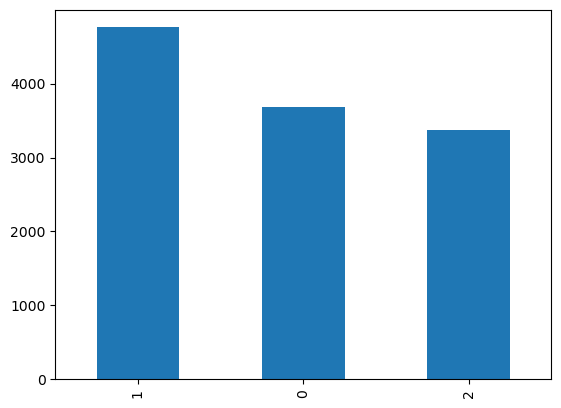

In [78]:
# take look at the counts of each class now
class_dist = df['Class'].value_counts()
class_dist.plot(kind='bar')

In [79]:
print(class_dist)

1    4759
0    3680
2    3374
Name: Class, dtype: int64


* We can see that the dataset becomes balanced now. 
* We have 3680 non-mainstream songs, 4759 mainstream (not rock) songs, and 3374 rock songs

1.2.3 Normalization

Naive Bayes models are sensitive to scales. Therefore, we need to normalize our features.

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
df_feature = df.drop(columns=['Class'], axis=1)

In [83]:
scaler.fit(df_feature)

MinMaxScaler()

In [84]:
df_feature_scale = pd.DataFrame(scaler.transform(df_feature))
df_feature_scale.columns = df_feature.columns

In [94]:
df_class = df[['Class']]

In [96]:
df_class = df_class.reset_index(drop=True)

In [99]:
# concatenate scaled features with classes
df = pd.concat([df_feature_scale, df_class],axis=1)
df.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,Class
0,0.546392,0.343500,0.813996,0.771487,0.019836,0.001104,4.025104e-03,0.090909,0.572632,0.459689,0.170413,2
1,0.350515,0.399740,0.613992,0.742101,0.032877,0.487952,1.957833e-04,0.389858,0.799314,0.626804,0.074240,1
2,0.536082,0.110967,0.974999,0.850036,0.212055,0.000170,1.616367e-02,0.163351,0.076427,0.901766,0.155674,2
3,0.536082,0.184512,0.977000,0.987303,0.092603,0.003544,6.063259e-03,0.163351,0.231569,0.655013,0.140898,1
4,0.484536,0.659312,0.657993,0.707152,0.089315,0.405622,3.413658e-07,0.087950,0.684933,0.603316,0.222982,1


#### 1.3 Data Exploration

In [100]:
import seaborn as sns

In [101]:
# prepare data for graphs
dfm = df.melt(id_vars='Class', var_name='Distribution')

In [102]:
dfm.head()

,Class,Distribution,value
0,2,Popularity,0.546392
1,1,Popularity,0.350515
2,2,Popularity,0.536082
3,1,Popularity,0.536082
4,1,Popularity,0.484536


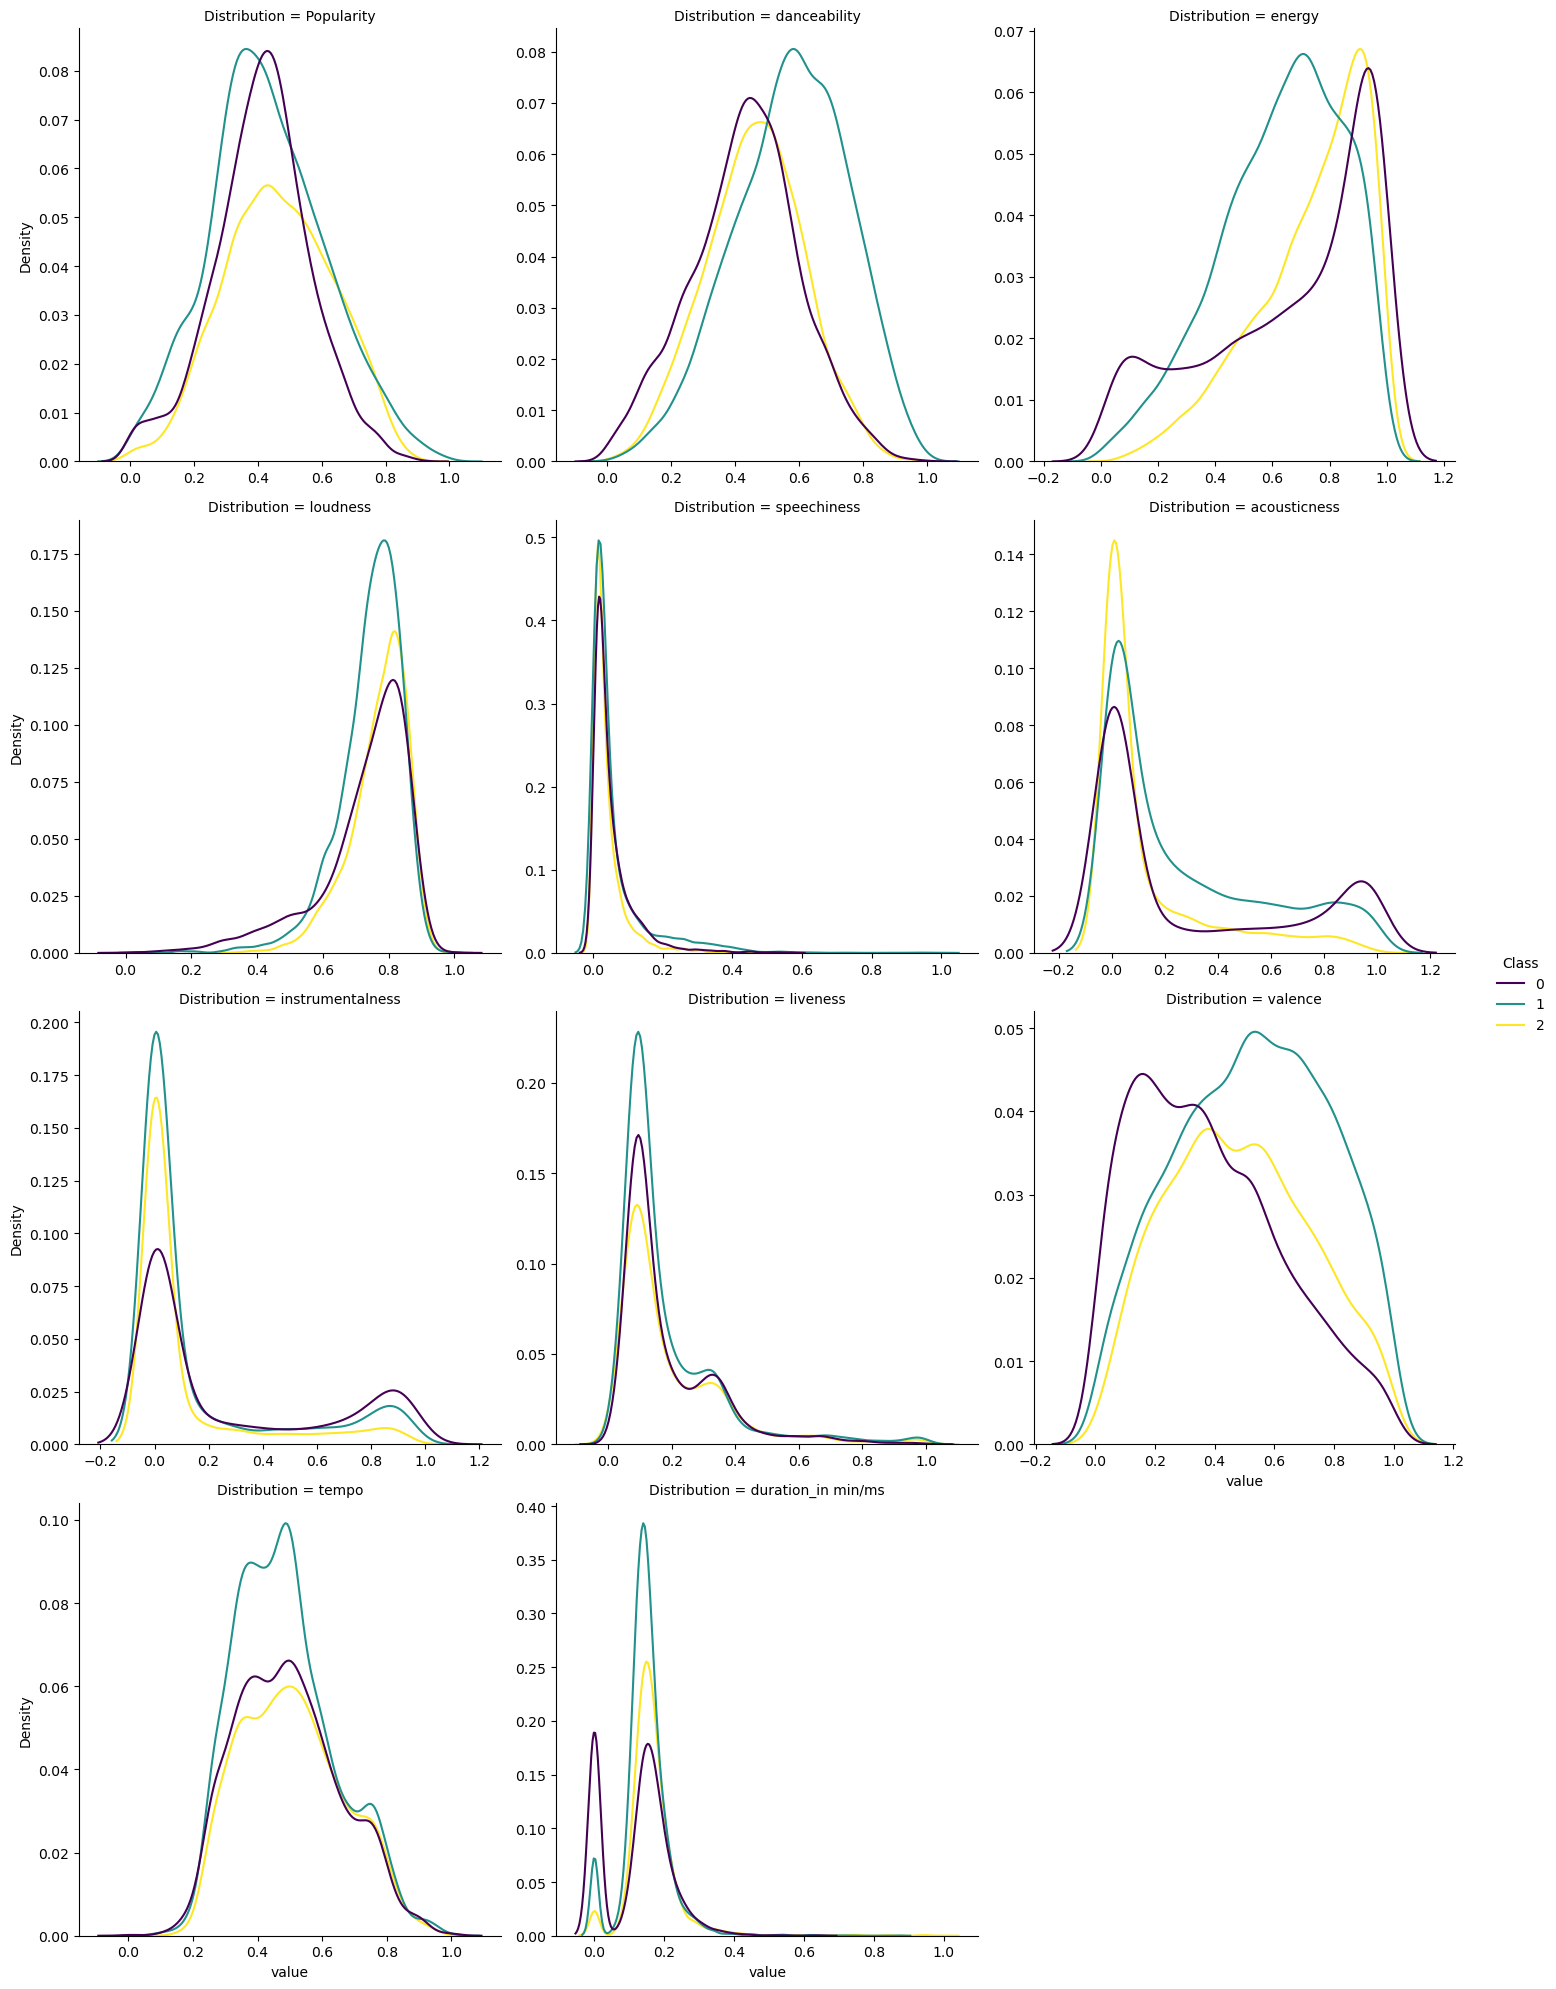

In [103]:
# plot density curve for each feature and each class
sns.displot(kind='kde', data=dfm, col='Distribution', col_wrap=3, x='value', hue='Class', palette='viridis', 
fill=False, facet_kws={'sharey': False, 'sharex': False})

* From the plots above we see that for most of the acoustic features, the density curves of three classes have similar shapes. It is expected since they are all songs, instead of classical pieces or white noises. It is also expected to see that for most of the features, the curves of class 1 (mainstream no rock) have the highest heights since it has the most amount of data. Although for some of the features the distributions might be more similar for all the classes while the others are more distant, indeed there are differences in the distributions among classes for every feature. 

### MODELS

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

* To prepare for the model learning later, we should split our data into training and testing data. The proportion I apply is 70/30.

In [109]:
X = df.iloc[:, :11]
y = df['Class']

In [117]:
# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

* Notice that the stratify parameter here is set to be not None, because altough our dataset is not imbalanced, our classes are not equal in terms of size. Therefore, setting stratify to y ensures that relative class frequencies is approximately preserved in each train and validation fold.

#### 2.1 Random forest Classifier

2.1.1 Model Introduction

* Random Forest Classifier is an ensemble learning algorithm compatible with multiclass classification tasks. It combines multiple decision trees trained on subsets of data and features to make a more accurate prediction. It is robust and can handle noisy and high-dimensional data, but can be computationally expensive and may not perform well on datasets with complex relationships. It provides feature importance ranking.

2.1.2 Model Training & Tuning 

- Grid search
    - It is a method for finding the optimal combination of hyper-parameters
    - GridSearchCV
        - cv = 5, 5-fold cross validation
            - Cross validation is for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. It is very useful for detecting overfitting.
        - verbose = 1, controls the amount of messages presented
        - n_jobs = -1, using all processors to run
- Parameters tuned
    * n_estimators
        * the number of decision trees to include in the random forest
        * increasing the number of trees can improve performance but can also increase the computational cost
        * [10, 50, 100, 250]
    * max_depth
        * the maximum depth of each decision tree in the random forest
        * setting a maximum depth can help prevent overfitting
        * [5, 10, 20]
    * max_features
        *  the maximum number of features to consider when looking for the best split at each node in a decision tree
        * auto: considers all features.
        * sqrt: considers the square root of the total number of features.
        * log2: considers the logarithm of the total number of features to the base 2.

In [118]:
rf_clf = RandomForestClassifier(random_state=42)

In [119]:
param1 = {}
param1['n_estimators'] = [10, 50, 100, 250]
param1['max_depth'] = [5, 10, 20]
param1['max_features'] = ["auto", "sqrt", "log2"]

In [120]:
gs_rf = GridSearchCV(rf_clf, param1, cv=5, n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 250]},
             verbose=1)

In [123]:
# here is the best set of parameters 
print(gs_rf.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 250}


2.1.3 Model Performance

* Accuracy: the number of true positives plus true negatives divided by the total number of samples
* Precision: the proportion of true positives among all samples predicted as positive
* Recall: the proportion of true positives among all actual positive samples
* F1-score: the harmonic mean of precision and recall
* ROC: plots the true positive rate (TPR) against the false positive rate (FPR) for different classification thresholds
* AUC: evaluate the overall performance of a classification model, regardless of the chosen threshold

In [148]:
# here is the accuracy of using the model with best parameters on testing data
best_rf = gs_rf.best_estimator_
best_rf.score(X_test, y_test)

0.6176636568848759

In [238]:
# here we calculate the predicted classes and the predicted probabilities for each class
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)

In [239]:
print(classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock']))
rf_report = classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock'], output_dict=True)

                      precision    recall  f1-score   support

      Non-mainstream       0.72      0.58      0.64      1104
Mainstream (No Rock)       0.64      0.76      0.70      1428
                Rock       0.48      0.46      0.47      1012

            accuracy                           0.62      3544
           macro avg       0.61      0.60      0.60      3544
        weighted avg       0.62      0.62      0.61      3544



* We can see that the model performed best on the "Mainstream (No Rock)" class, with a precision of 0.64, recall of 0.76, and F1-score of 0.70. The "Non-mainstream" class had a lower precision of 0.72 but a lower recall of 0.58, resulting in an F1-score of 0.64. The "Rock" class had the lowest precision, recall, and F1-score among the three classes, with values of 0.48, 0.46, and 0.47, respectively.

* The macro average F1-score across all classes is 0.60, indicating that the model performed moderately well across all classes. The weighted average F1-score is 0.61, indicating that the model performed slightly better on the larger classes. The overall accuracy of the model is 0.62, meaning that it correctly predicted the class for 62% of the samples.

Let's take a look at ROC curves and AUC

In [151]:
# The following codes are modified based on 
# https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

def roc_curves_multiclass(y_pred_prob):
    """
    Plot roc curves for multiclass, show AUC scores in the legend.

    Inputs:
        y_pred_prob: predicted probabilities of each class
    """
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i],
                label='ROC curve of class {0} (AUC = {1:0.2f})'
                ''.format(i, roc_auc[i]))
                
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

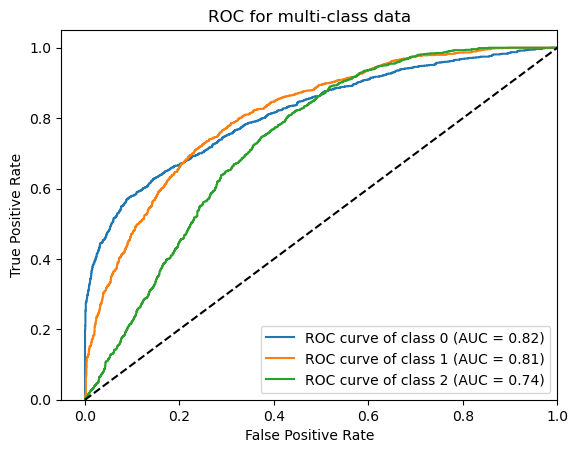

In [152]:
roc_curves_multiclass(y_pred_prob)

* Looking at the AUC values for each class, we can see that the model performed best on class 0 with an AUC of 0.82, followed closely by class 1 with an AUC of 0.81. Class 2 had the lowest AUC value of 0.74, indicating that the model had slightly lower discriminatory power in distinguishing this class from the others.
* The model performed better than random guessing. However, the differences in AUC values between the classes suggest that the model may have varying levels of performance across different classes.

2.1.4 Error Analysis

In [170]:
# check the errors
y_test[y_test != y_pred]

5492    0
4380    0
5475    0
3843    1
2220    2
       ..
5763    1
36      1
8904    0
6504    1
4187    2
Name: Class, Length: 1355, dtype: int64

In [172]:
# take look at an error for each class
y_0_pred = y_pred[0]
y_1_pred = y_pred[3]
y_2_pred = y_pred[4]

In [173]:
print(y_0_pred, y_1_pred, y_2_pred)

1 2 1


In [178]:
print(X_test.loc[5492])

Popularity            0.494845
danceability          0.504651
energy                0.437989
loudness              0.748170
speechiness           0.013041
acousticness          0.446787
instrumentalness      0.003332
liveness              0.207224
valence               0.289799
tempo                 0.178873
duration_in min/ms    0.132142
Name: 5492, dtype: float64


In [179]:
print(X_test.loc[3843])

Popularity            0.639175
danceability          0.148821
energy                0.803996
loudness              0.818467
speechiness           0.017315
acousticness          0.000070
instrumentalness      0.007780
liveness              0.070503
valence               0.415618
tempo                 0.799287
duration_in min/ms    0.202005
Name: 3843, dtype: float64


In [180]:
print(X_test.loc[2220])

Popularity            0.546392
danceability          0.394333
energy                0.963999
loudness              0.799835
speechiness           0.074082
acousticness          0.000455
instrumentalness      0.002690
liveness              0.182736
valence               0.195175
tempo                 0.618065
duration_in min/ms    0.149329
Name: 2220, dtype: float64


* Since the relationships between the features and our classess are more implicit (than for example sentiment analysis), it is difficult to explain why those errors occur. However, one possible solution might be to weight the features differently based on their possible contributions to the classifiers. Also, maybe dimensionality reduction can improve the model preformance.

#### 2.2 K-Nearest Neighbors Classifier

2.2.1 Model Introduction

* K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for multiclass classification.

* Given a new data point, the algorithm identifies the k nearest data points in the training set and assigns the class label or predicts the value based on the most common class label or the average value of the k-nearest data points, respectively. 

* The choice of k affects the classification accuracy, where a smaller k may result in overfitting and a larger k may result in underfitting. The algorithm is simple to implement and is a good choice for small to medium-sized datasets, but may not be scalable to large datasets due to the expensive computations.





2.2.2 Model Training & Tuning

- Parameters tuned
    * n_neighbors:
        * the number of nearest neighbors that will be used to classify or predict the value of a new data point
        * a higher value of n_neighbors generally results in a smoother decision boundary but may also increase the risk of overfitting
        * [2,5,10,25,50]
    * weights:
        * give more importance to the nearest neighbors based on their distance to the new data point
        * uniform: give equal weight to all neighbors
        * distance: give higher weight to closer neighbors

In [130]:
knn_clf = KNeighborsClassifier()

In [131]:
param2 = {}
param2['n_neighbors'] = [2,5,10,25,50]
param2['weights'] = ['uniform', 'distance']

In [132]:
gs_knn = GridSearchCV(knn_clf, param2, cv=5, n_jobs=-1, verbose=1)
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/axyz1220/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/axyz1220/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=1)

(The FutureWarning here does not affect the performance of gridsearch.)

In [133]:
# check the set of best parameters
print(gs_knn.best_params_)

{'n_neighbors': 50, 'weights': 'uniform'}


2.2.3 Model Performance

In [218]:
# check the overall accuracy of the best model on testing data
best_knn = gs_knn.best_estimator_
best_knn.score(X_test, y_test)

/Users/axyz1220/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5663092550790068

In [243]:
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)

/Users/axyz1220/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [244]:
knn_report = classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock'], output_dict=True)
print(classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock']))

                      precision    recall  f1-score   support

      Non-mainstream       0.60      0.51      0.56      1104
Mainstream (No Rock)       0.60      0.71      0.65      1428
                Rock       0.46      0.42      0.44      1012

            accuracy                           0.57      3544
           macro avg       0.56      0.55      0.55      3544
        weighted avg       0.56      0.57      0.56      3544



* The model achieved an overall accuracy of 0.57, which means it correctly classified 57% of the samples. The precision values for the three classes are between 0.46 and 0.6, indicating that the model's ability to correctly identify each class is moderate. The recall values are between 0.42 and 0.71, indicating that the model's ability to capture each class in the dataset is also moderate. The F1-score values are between 0.44 and 0.65, suggesting a reasonable balance between precision and recall for each class. The macro average and weighted average of the metrics are both around 0.55 to 0.56, indicating that the model performs similarly across the three classes. Overall, while the model's performance is not high, it may still provide some value depending on the specific problem.

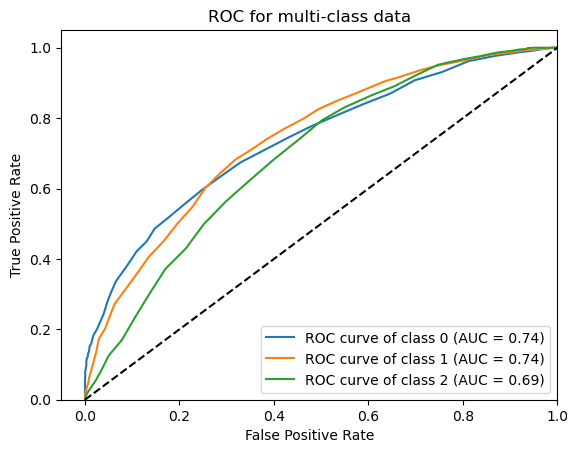

In [ ]:
roc_curves_multiclass(y_pred_prob)

* In this case, class 1 and class 2 have the same AUC value of 0.74, which suggests that the classifier performs similarly well in predicting positive instances for both classes. The AUC value for class 3 is slightly lower at 0.69, indicating that the classifier performs slightly less well in predicting positive instances for this class. Overall, these AUC values suggest that the classifier may have moderate predictive performance for these classes.

2.2.4 Error Analysis

* Notice that the model performs the worst on Rock (class 3). We take a close look at the features of predicted Rock and true Rock.

In [183]:
X_test_copy = X_test.copy()
X_test_copy['class_pred'] = y_pred
X_test_copy['class'] = y_test

(array([392., 224., 111., 122.,  39.,  17.,  13.,   7.,   4.,   4.]),
 array([0.0127538 , 0.11096827, 0.20918274, 0.3073972 , 0.40561167,
        0.50382614, 0.60204061, 0.70025508, 0.79846954, 0.89668401,
        0.99489848]),
 <BarContainer object of 10 artists>)

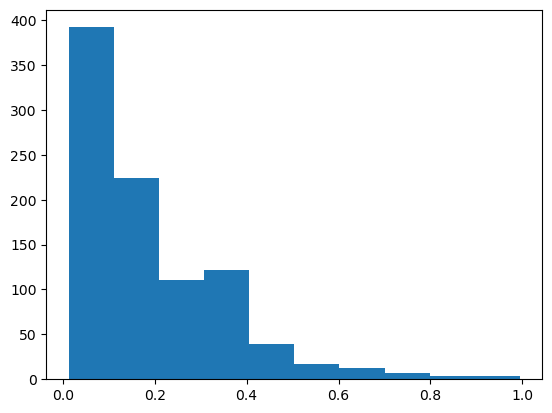

In [198]:
plt.hist(X_test_copy[X_test_copy['class_pred']==2]['liveness'])

(array([364., 315., 112., 110.,  43.,  20.,  18.,   7.,  10.,  13.]),
 array([0.        , 0.0986736 , 0.19734721, 0.29602081, 0.39469442,
        0.49336802, 0.59204163, 0.69071523, 0.78938884, 0.88806244,
        0.98673605]),
 <BarContainer object of 10 artists>)

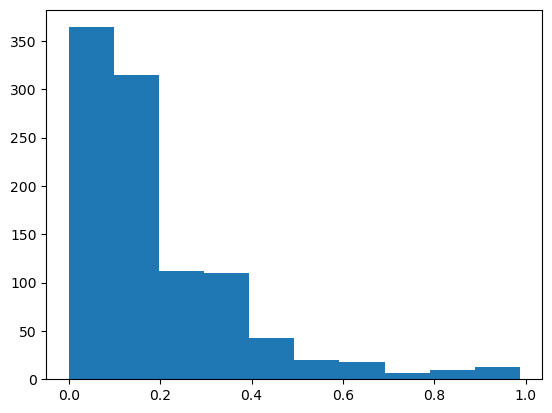

In [199]:
plt.hist(X_test_copy[X_test_copy['class']==2]['liveness'])

* We can see that the distributions of liveness from predicted Rock and true Rock are slightly different due to errors. Possible solution might be that to find some theories that explain the differences in liveness between rock and non-rock, and then readjust the weights of our features.

#### 2.3 Gaussian Naive Bayes

2.3.1 Model Introduction

* It is a probabilistic classification algorithm based on Bayes' theorem that assumes the features are independent and follow a normal distribution. The algorithm calculates the conditional probability of a given class for a given set of features and selects the class with the highest probability as the predicted class.

* It is also compatible with multiclass classification task by nature.



2.3.2 Model Training & Tuning

- Parameters tuned
    * var_smoothing
        * avoid zero probabilities in the calculation of the class conditional probabilities
        * add a small smoothing factor to the variance of each feature in the training data, which has the effect of slightly increasing the variance and thus reducing the likelihood of the model overfitting 
        * np.logspace(0,-9, num=100): return 100 numbers spaced evenly on a log scale from 0 to -9

In [137]:
gnb_clf = GaussianNB()

In [138]:
param3 = {}
param3['var_smoothing'] = np.logspace(0,-9, num=100)

In [139]:
gs_gnb = GridSearchCV(gnb_clf, param3, cv=5, n_jobs=-1, verbose=1)
gs_gnb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [140]:
# check the set of best parameters
print(gs_gnb.best_params_)

{'var_smoothing': 1.0}


In [141]:
# check the overall accuracy of the best model on testing data
best_gnb = gs_gnb.best_estimator_
best_gnb.score(X_test, y_test)

0.5228555304740407

In [240]:
y_pred = best_gnb.predict(X_test)
y_pred_prob = best_gnb.predict_proba(X_test)

In [241]:
gnb_report = classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock'], output_dict=True)
print(classification_report(y_test, y_pred, target_names=['Non-mainstream', 'Mainstream (No Rock)', 'Rock']))

                      precision    recall  f1-score   support

      Non-mainstream       0.57      0.25      0.35      1104
Mainstream (No Rock)       0.60      0.67      0.63      1428
                Rock       0.43      0.61      0.50      1012

            accuracy                           0.52      3544
           macro avg       0.53      0.51      0.49      3544
        weighted avg       0.54      0.52      0.51      3544



* The model's accuracy is 0.52, indicating that it correctly predicted the class for 52% of the data points. The precision scores were 0.57, 0.60, and 0.43 for the Non-mainstream, Mainstream (No Rock), and Rock classes, respectively, which were relatively low for all classes. The recall scores were 0.25, 0.67, and 0.61, indicating that the model correctly identified a relatively small proportion of the actual positive cases for Non-mainstream and correctly identified a higher proportion of actual positives for Mainstream (No Rock) and Rock. The F1-score was 0.35, 0.63, and 0.50 for the three classes. The macro-averaged F1-score was 0.49 and the weighted-averaged F1-score was 0.51, indicating that the model's performance was suboptimal and needs to be improved.

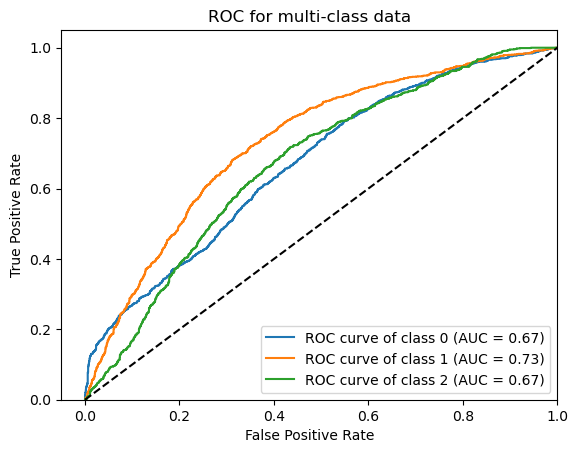

In [145]:
roc_curves_multiclass(y_pred_prob)

* The AUC values indicate that the model has good performance in distinguishing class 2 from the other classes with an AUC of 0.73, while the AUC values for class 1 and class 3 are moderate with values of 0.67. This suggests that the model is better at distinguishing class 2 from the others than class 1 and class 3

2.3.4 Error Analysis
We take a close look at the features of predicted and true class 0 here.

In [208]:
X_test_copy = X_test.copy()
X_test_copy['class_pred'] = y_pred
X_test_copy['class'] = y_test

(array([24., 60., 51., 70., 93., 71., 71., 30., 15.,  4.]),
 array([0.        , 0.08247891, 0.16495782, 0.24743673, 0.32991564,
        0.41239455, 0.49487346, 0.57735237, 0.65983128, 0.74231019,
        0.8247891 ]),
 <BarContainer object of 10 artists>)

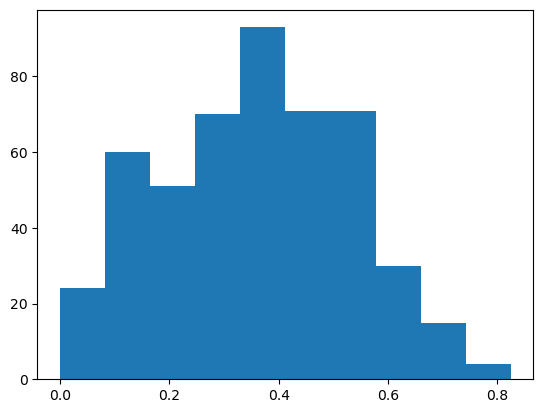

In [216]:
plt.hist(X_test_copy[X_test_copy['class_pred']==0]['danceability'])

(array([ 26.,  74., 113., 161., 265., 233., 131.,  65.,  33.,   3.]),
 array([0.        , 0.09296993, 0.18593987, 0.2789098 , 0.37187973,
        0.46484966, 0.5578196 , 0.65078953, 0.74375946, 0.8367294 ,
        0.92969933]),
 <BarContainer object of 10 artists>)

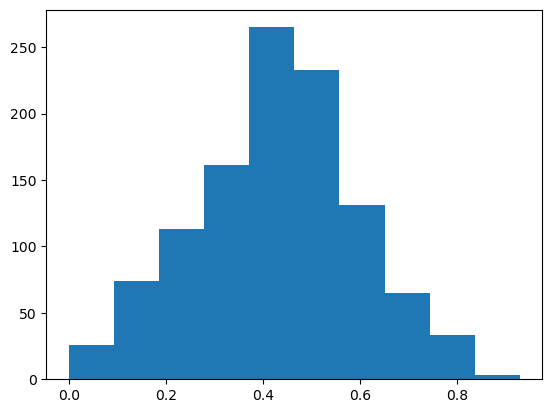

In [217]:
plt.hist(X_test_copy[X_test_copy['class']==0]['danceability'])

* We can see that the distributions of danceability from predicted non-mainstream and true non-mainstream are slightly different due to errors. Possible solution might be that to find some theories that explain the differences in danceability between non-mainstream and mainstream, and then readjust the weights of our features.

### MODEL COMPARISON

In [260]:
df_rf_report = pd.DataFrame(rf_report).transpose().iloc[0:3,0:3]
df_knn_report = pd.DataFrame(knn_report).transpose().iloc[0:3,0:3]
df_gnb_report = pd.DataFrame(gnb_report).transpose().iloc[0:3,0:3]
df_rf_report['AUC'] = np.array([0.82, 0.81, 0.74])
df_knn_report['AUC'] = np.array([0.74, 0.74, 0.69])
df_gnb_report['AUC'] = np.array([0.67, 0.73, 0.67])

In [261]:
df_report = pd.concat([df_rf_report,df_knn_report,df_gnb_report],axis=1)
df_report.columns = pd.MultiIndex.from_product([['RF', 'KNN', 'GNB'], list(df_rf_report.columns)])

In [262]:
df_report

RF                                 KNN            \
                     precision    recall  f1-score   AUC precision    recall   
Non-mainstream        0.720588  0.576993  0.640845  0.82  0.604899  0.514493   
Mainstream (No Rock)  0.641253  0.759804  0.695513  0.81  0.604067  0.707283   
Rock                  0.482438  0.461462  0.471717  0.74  0.459807  0.423913   

                                           GNB                            
                      f1-score   AUC precision    recall  f1-score   AUC  
Non-mainstream        0.556045  0.74  0.570552  0.252717  0.350282  0.67  
Mainstream (No Rock)  0.651613  0.74  0.595046  0.672969  0.631614  0.73  
Rock                  0.441131  0.69  0.425694  0.605731  0.500000  0.67

* We can see that for every class, random forest classifier has the highest AUC, which means in general RF provides the best performance on the testing data. However, for Rock, in terms of determining the true positives, GNB acutually has a better performance since it has the highest recall score.